# Multilinear Regression

- **Linear Regression** is a scenario where one variable affects another, this is a very rare case.

- **Predictors**, **Regressors**, **Inputs** or **Independent** **Variables** all mean the same.

# Data Prep

In [ ]:
# Loading the directory
%cd /content/drive/MyDrive/Business Analyst Workbooks/Multilinear Regression

/content/drive/MyDrive/Business Analyst Workbooks/Multilinear Regression


In [ ]:
#Libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns

In [ ]:
# Load the Data
df = pd.read_csv("salaries.csv")

In [ ]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Methods to Analyse data using Python

In [ ]:
# Summary
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


- **Outliers** are the data entries that can damage the quality of your analysis.

- We must be able to distinguish between **noise** and **valuable** **information**. To eliminate the noise we must use appropriate techniques to separate it.

- Now let's try to plot dependent variables against independent variables.

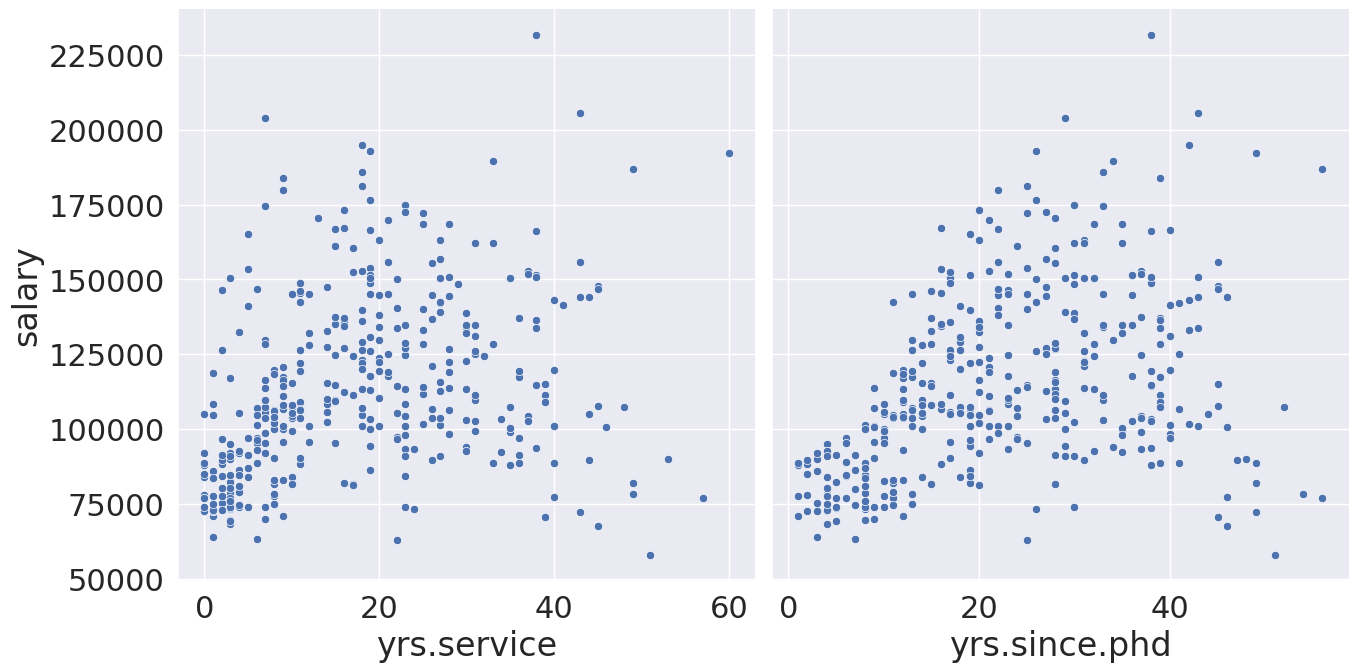

In [ ]:
  sns.set(font_scale = 2)
  sns.pairplot(data = df,
               y_vars = ['salary'],
               x_vars = ['yrs.service', 'yrs.since.phd'],
               height = 7)

- As the plots look kind of similar, we can explore the relation between the independent variables using correlation matrix.

<ipython-input-12-1a7604adb5a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

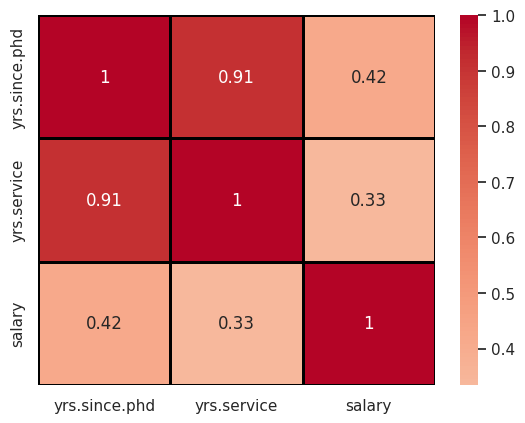

In [ ]:
sns.set(font_scale = 1)
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.2g',
            center = 0,
            cmap = 'coolwarm',
            linewidths = 1,
            linecolor = 'Black')

- As **yrs.since.phd** correlates better with **salary** than **yrs.service** so we need are considering **yrs.since.phd**.

- We have looked plenty at the **continuous variables** now we will be looking at **categorical variables**.

In [ ]:
# Categories of the Professors
df['rank'].value_counts()

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

- Checking for each and every variable might be hectic, there is a way we can ask the interpreter to find non-numeric data from the dataframe and ask it to do data count.

In [ ]:
df.select_dtypes(include = 'object').value_counts()

rank       discipline  sex   
Prof       B           Male      125
           A           Male      123
AsstProf   B           Male       38
AssocProf  B           Male       32
           A           Male       22
AsstProf   A           Male       18
Prof       B           Female     10
           A           Female      8
AssocProf  B           Female      6
AsstProf   A           Female      6
           B           Female      5
AssocProf  A           Female      4
dtype: int64

- This outcome is based on the size on each category, let's try doing it by loops.

In [ ]:
# For Loop for categorical variables
categorical = df.select_dtypes(include = 'object')
categorical.head()

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male


In [ ]:
# To just get the list of variables we can do it by
categorical = list(df.select_dtypes(include = 'object'))
categorical

['rank', 'discipline', 'sex']

In [ ]:
# Let's apply for loop for each category
for cat in categorical:
  print(df[cat].value_counts())

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
Male      358
Female     39
Name: sex, dtype: int64


- Categorical data won't be accepted in ML models if they are non-numeric so we need to create dummy variables to get them into the ML model.

In [ ]:
# Look at the dataset
df.head(1)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750


In [ ]:
# Transform the categorical data to dummies
df = pd.get_dummies(data = df, drop_first = True)
df.head(2)

,yrs.since.phd,yrs.service,salary,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,18,139750,0,1,1,1
1,20,16,173200,0,1,1,1


In [ ]:
df['rank_Prof'].value_counts()

1    266
0    131
Name: rank_Prof, dtype: int64

# Multilinear Regression Prep

In [ ]:
# Isolate X and Y
y = df.salary/1000 # To make it legible
y.head()

0    139.75
1    173.20
2     79.75
3    115.00
4    141.50
Name: salary, dtype: float64

In [ ]:
# We chose yrs.since.phd over yrs.service so we are dropping that and using the rest for regression
x = df.drop(columns = ["salary", "yrs.service"])
x.head(1)

,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,19,0,1,1,1


In [ ]:
# Adding Constant
x = sm.add_constant(x)
x.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
0,1.0,19,0,1,1,1
1,1.0,20,0,1,1,1
2,1.0,4,1,0,1,1
3,1.0,45,0,1,1,1
4,1.0,40,0,1,1,1


# Under and Overfitting

- Neither having a simple model won't help nor having a complex model will help because it won't help in other scenarios.

- There must be exact number of regressors to get the value out of the analysis.

- We need an unbiased way of checking the model and to do that we split the data into two categories training data and testing data.

- 80% of data is put into training data and is used to train the model and the 20% is put to testing category to run tests and ensure test is accurate or not.

In [ ]:
# Splitting the data to training and testing datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_split = train_test_split(x,y,
                                                     test_size=0.2,
                                                     random_state=1502)
x_train.head()

,const,yrs.since.phd,rank_AsstProf,rank_Prof,discipline_B,sex_Male
105,1.0,31,0,1,0,1
287,1.0,2,1,0,0,1
326,1.0,23,0,1,1,1
15,1.0,12,0,1,1,1
354,1.0,8,1,0,1,1
